In [1]:
import pymysql

In [2]:
# connection
mydb = pymysql.connect(host="localhost", user="root", password="", db="sqdb")
query = mydb.cursor()

In [227]:
query.execute("SELECT a.Payment_date, SUM(b.Pay_amount) as Pay_amount FROM payment_collection_organization_master a INNER JOIN payment_collection_organization_detail b ON(a.Payment_id = b.Payment_id) WHERE a.Transaction_posting_type=2 AND a.Payment_date<'2018-01-01' GROUP BY a.Payment_date")
result = query.fetchall()

print(len(result))

1233


In [228]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd

In [245]:
df = pd.DataFrame( [[ij for ij in i] for i in result] )
df.rename(columns={0: 'date', 1: 'amount'}, inplace=True);
df.head()

,date,amount
0,2012-12-27,33000.00
1,2013-02-04,4880.00
2,2013-02-19,38277.00
3,2013-04-07,70000.00
4,2013-04-18,15000.00


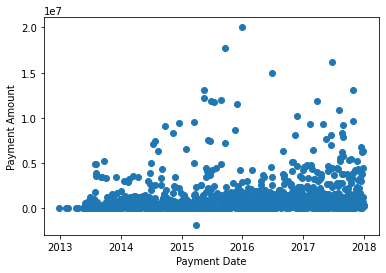

In [246]:
plt.xlabel('Payment Date')
plt.ylabel('Payment Amount')
plt.scatter(df.date, df.amount)

In [247]:
import datetime as dt
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].map(dt.datetime.toordinal)
X = df[['date']].tail(180)
y = df['amount'].tail(180).astype('float64')
X

,date
1053,736463
1054,736464
1055,736465
1056,736466
1057,736467
...,...
1228,736689
1229,736690
1230,736691
1231,736693


In [248]:
y_train

1224    6227815.25
1225    1134559.00
1227    6313188.00
1232     242394.00
1228    1199481.15
1229     685697.00
1231     386455.00
1223     483491.00
Name: amount, dtype: float64

In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [250]:
X_train

,date
1114,736541
1083,736499
1210,736663
1183,736632
1195,736645
...,...
1181,736630
1138,736571
1076,736490
1104,736529


In [251]:
y_test

1148     454518.00
1190    4195884.00
1085    2366220.00
1160    1270046.00
1216      76537.00
1205     181408.00
1147      30000.00
1168    1059107.00
1209    4393114.00
1178    1291622.00
1055     852698.00
1177     795463.00
1228    1199481.15
1121    5534856.00
1225    1134559.00
1139    7932835.00
1231     386455.00
1207     272000.00
1123    2809253.00
1192      15402.00
1221    3036748.00
1122     555469.00
1065    4661330.00
1212     220000.00
1211     870513.00
1091     550417.00
1167     620506.00
1095     196252.00
1105     365866.00
1214     635329.00
1226      85604.00
1162    1680777.00
1130    6269247.00
1163      25509.00
1227    6313188.00
1229     685697.00
Name: amount, dtype: float64

In [252]:
reg=LinearRegression() #creat the object for the regression
reg.fit(X_train, y_train)  #pass the data through the model, reg.fit(1st argument, 2nd argument);
            #1st argument have to be two dimentional or 2D array
            #2nd argument have to be y axis or the output, since y=mx+c

LinearRegression()

In [253]:
reg.predict(X_test)

array([2035560.926332  , 2180123.62810016, 1781130.57121992,
       2081820.99089766, 2275535.01126719, 2235057.454772  ,
       2032669.67229652, 2107842.27721596, 2246622.47091341,
       2142537.32564044, 1677045.42594695, 2139646.07160497,
       2324686.32986832, 1919910.76491737, 2310230.05969143,
       1986409.60773087, 2336251.34600973, 2240839.9628427 ,
       1925693.27298808, 2185906.13617086, 2298665.04355001,
       1922802.01895285, 1711740.47437119, 2261078.7410903 ,
       2258187.48705482, 1818716.87367964, 2104951.02318072,
       1833173.14385653, 1864976.93824553, 2266861.24916101,
       2316012.56776214, 2087603.4989686 , 1957497.06737709,
       2093386.00703931, 2318903.82179761, 2327577.58390355])

In [254]:
y_test

1148     454518.00
1190    4195884.00
1085    2366220.00
1160    1270046.00
1216      76537.00
1205     181408.00
1147      30000.00
1168    1059107.00
1209    4393114.00
1178    1291622.00
1055     852698.00
1177     795463.00
1228    1199481.15
1121    5534856.00
1225    1134559.00
1139    7932835.00
1231     386455.00
1207     272000.00
1123    2809253.00
1192      15402.00
1221    3036748.00
1122     555469.00
1065    4661330.00
1212     220000.00
1211     870513.00
1091     550417.00
1167     620506.00
1095     196252.00
1105     365866.00
1214     635329.00
1226      85604.00
1162    1680777.00
1130    6269247.00
1163      25509.00
1227    6313188.00
1229     685697.00
Name: amount, dtype: float64

In [255]:
X_test

,date
1148,736589
1190,736639
1085,736501
1160,736605
1216,736672
1205,736658
1147,736588
1168,736614
1209,736662
1178,736626


In [256]:
#We will find the accuracy of this model(our model was liner regression model) for our dataset
reg.score(X_test, y_test)

-0.06743059303466392